<a href="https://colab.research.google.com/github/TXH2020/MainRepo/blob/main/Academics/Image%20Processing/Image_Processing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import estimate_sigma
import cv2
from skimage import measure
from skimage import metrics
from skimage.util import random_noise
from skimage.color import rgb2gray,gray2rgb
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc,signal
import matplotlib.pylab as pylab
import urllib.request as ureq

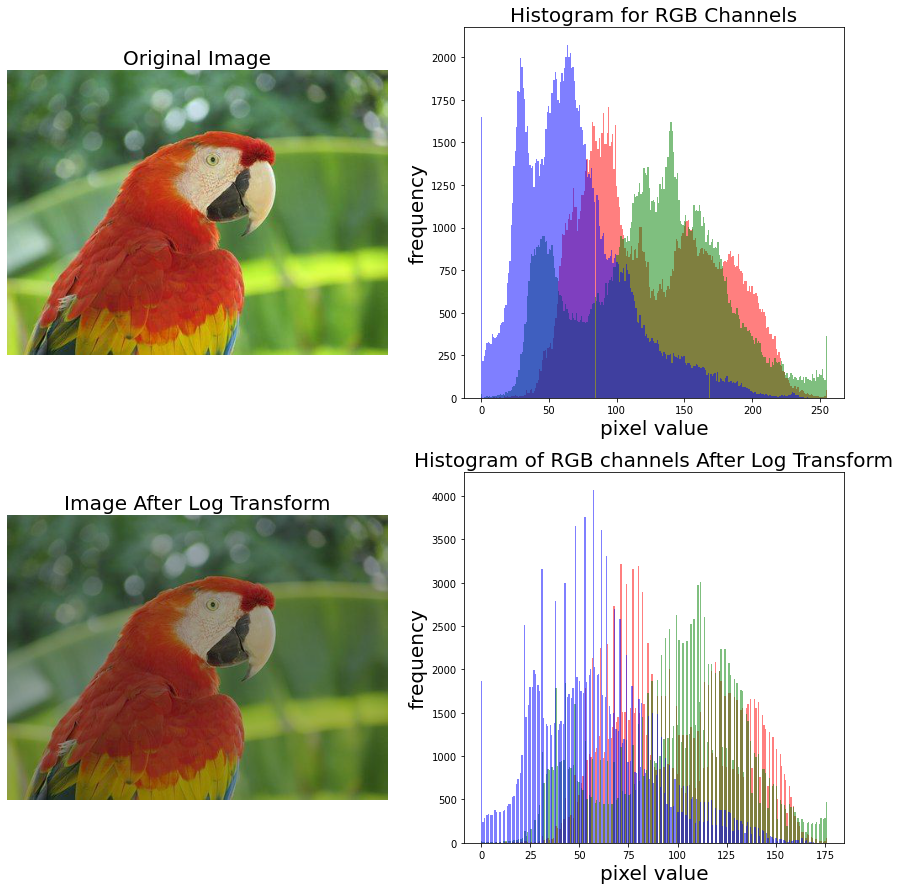

In [2]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off')
def plot_hist(r, g, b, title=''):
    pylab.hist(np.array(r).ravel(), bins=256, color='r', alpha=0.5)
    pylab.hist(np.array(g).ravel(), bins=256,  color='g', alpha=0.5)
    pylab.hist(np.array(b).ravel(), bins=256,  color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=20), pylab.ylabel('frequency', size=20)
    pylab.title(title, size=20)
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/parrot.png','parrot.png')
im = Image.open("parrot.png")
im_r, im_g, im_b = im.split()
pylab.figure(figsize=(15,15))
pylab.subplot(221), plot_image(im, 'Original Image')
pylab.subplot(222), plot_hist(im_r, im_g, im_b,'Histogram for RGB Channels')
im = im.point(lambda i: 255*np.log(1+i/255))
im_r, im_g, im_b = im.split()
pylab.subplot(223), plot_image(im, 'Image After Log Transform')
pylab.subplot(224), plot_hist(im_r, im_g, im_b, 'Histogram of RGB channels After Log Transform')
pylab.show()

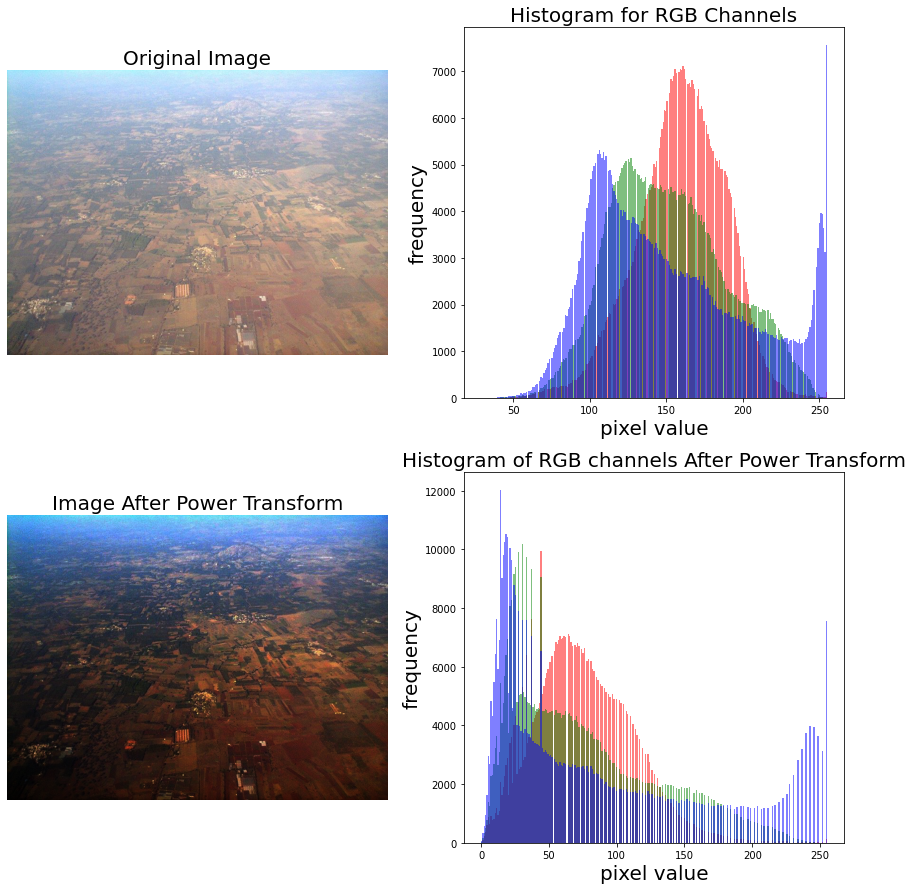

In [3]:
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/earthfromsky.jpg','earthfromsky.jpg')
im = Image.open("earthfromsky.jpg")
im_r, im_g, im_b = im.split()
pylab.figure(figsize=(15,15))
pylab.subplot(221), plot_image(im, 'Original Image')
pylab.subplot(222), plot_hist(im_r, im_g, im_b,'Histogram for RGB Channels')
im = im.point(lambda i: 255*((i/255)**3))
im_r, im_g, im_b = im.split()
pylab.subplot(223), plot_image(im, 'Image After Power Transform')
pylab.subplot(224), plot_hist(im_r, im_g, im_b, 'Histogram of RGB channels After Power Transform')
pylab.show()

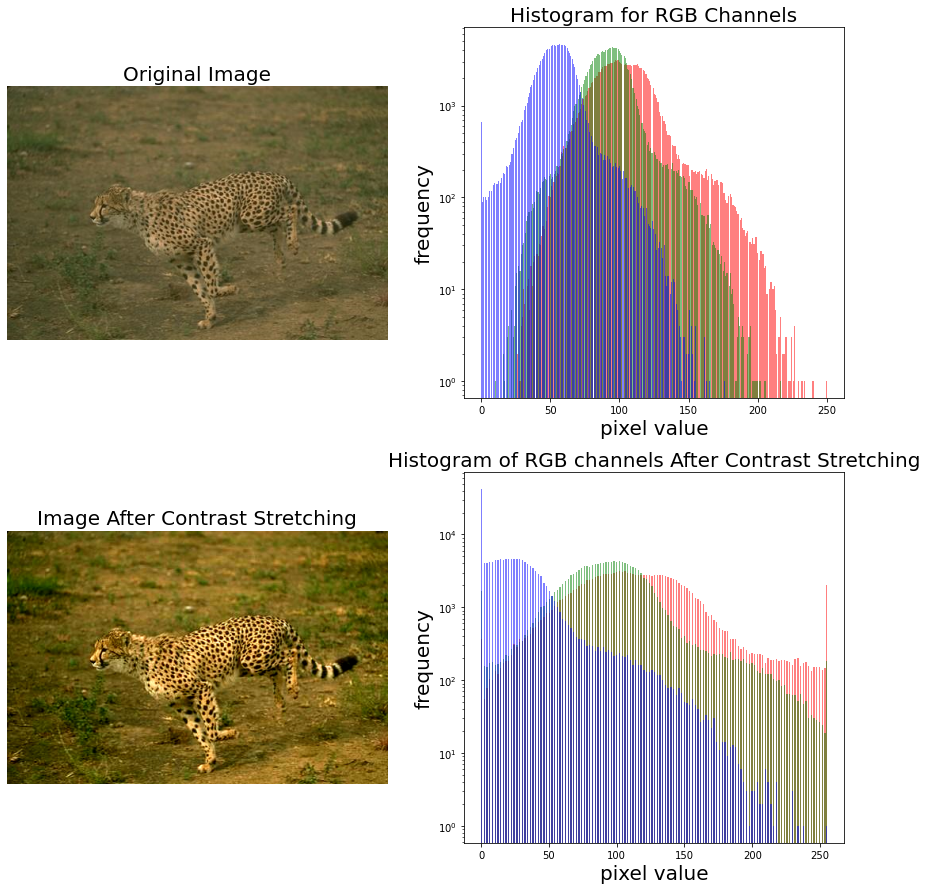

In [4]:
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/cheetah.png','cheetah.png')
im = Image.open("cheetah.png")
im_r, im_g, im_b,_ = im.split()
pylab.figure(figsize=(15,15))
pylab.subplot(221), plot_image(im, 'Original Image')
pylab.subplot(222), plot_hist(im_r, im_g, im_b,'Histogram for RGB Channels'),pylab.yscale('log',basey=10)
contrast = ImageEnhance.Contrast(im)
im = np.reshape(np.array(contrast.enhance(2).getdata()).astype(np.uint8), (im.height, im.width, 4))
im_r, im_g, im_b = im[...,0], im[...,1], im[...,2]
pylab.subplot(223), plot_image(im, 'Image After Contrast Stretching')
pylab.subplot(224), plot_hist(im_r, im_g, im_b, 'Histogram of RGB channels After Contrast Stretching'),pylab.yscale('log',basey=10)
pylab.show()

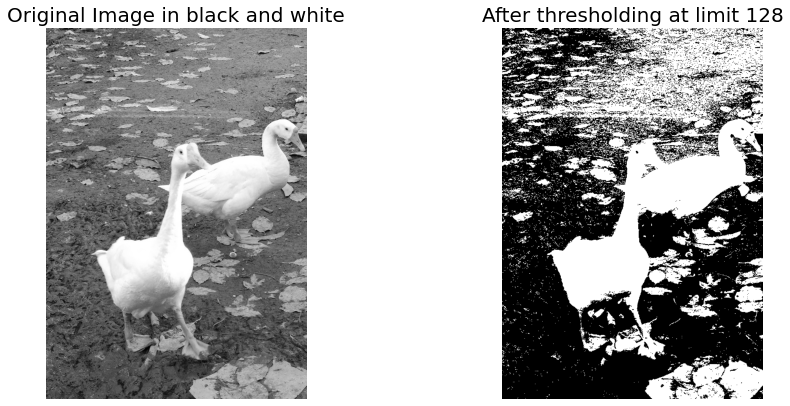

In [5]:
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/swans.jpg','swans.jpg')
im = Image.open("swans.jpg").convert('L')
pylab.figure(figsize=(15,15))
pylab.gray()
pylab.subplot(221), plot_image(im, 'Original Image in black and white')
im=im.point(lambda x:0 if x<128 else 255)
pylab.subplot(222), plot_image(im, 'After thresholding at limit 128')
pylab.show()

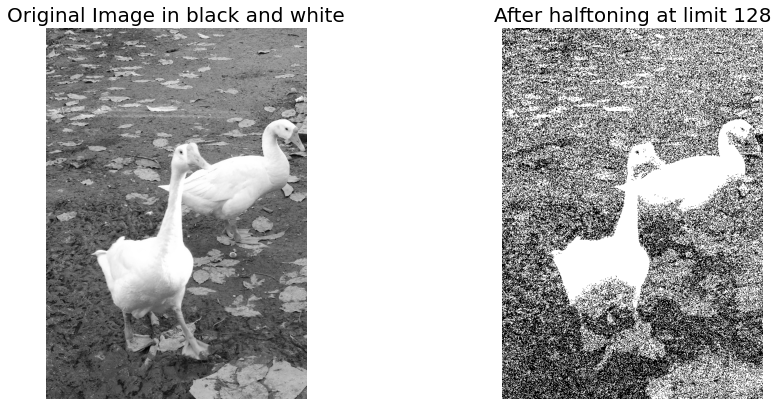

In [6]:
im = Image.open("swans.jpg").convert('L')
pylab.figure(figsize=(15,15))
pylab.subplot(221), pylab.gray(),plot_image(im, 'Original Image in black and white')
im=im.point(lambda x:x+np.random.randint(-128,128))
im=im.point(lambda x:0 if x<100 else 255)
pylab.subplot(222), plot_image(im, 'After halftoning at limit 128')
pylab.show()

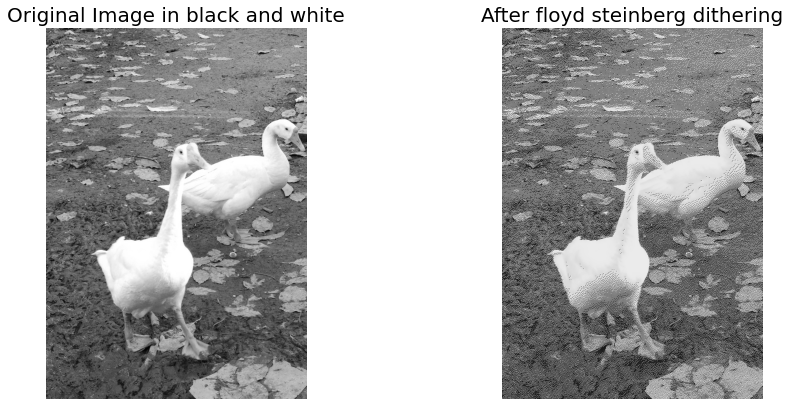

In [7]:
def find_closest_palette_color(oldpixel):
    return int(round(oldpixel / 255)*255)

im = rgb2gray(imread('swans.jpg'))*255
pixel = np.copy(im)
w, h = im.shape

for x in range(w):
  for y in range(h):
    oldpixel=pixel[x][y]
    newpixel=find_closest_palette_color(oldpixel)
    quant_error=oldpixel-newpixel
    pixel[x][y] = newpixel
    if(x<w-1):
      pixel[x+1][y]+=(7/16)*quant_error
    if(x<w-1 and y<h-1):
      pixel[x+1][y+1]+=(1/16)*quant_error
    if(y<h-1):
      pixel[x][y+1]+=(5/16)*quant_error
    if(x>0 and y<h-1):
      pixel[x-1][y]+=(3/16)*quant_error

pylab.figure(figsize=(15,15))
pylab.subplot(221), pylab.gray(),plot_image(im, 'Original Image in black and white')
pylab.subplot(222), plot_image(pixel, 'After floyd steinberg dithering')
pylab.show()

<Figure size 432x288 with 0 Axes>

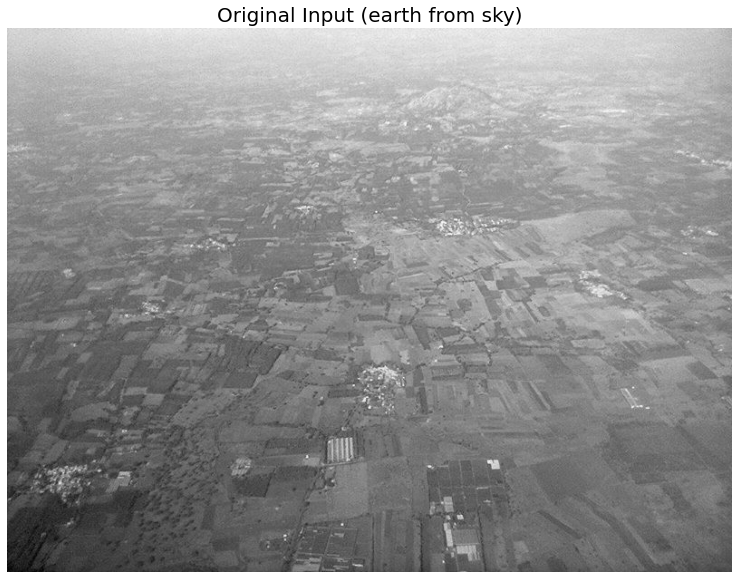

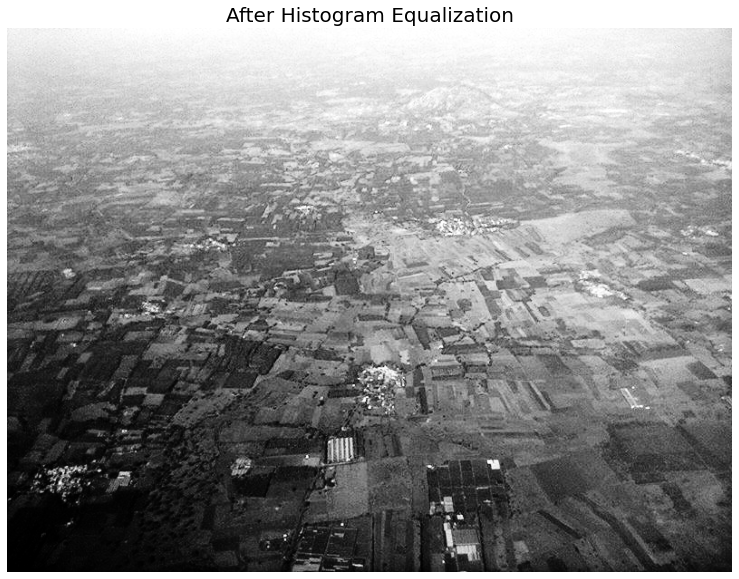

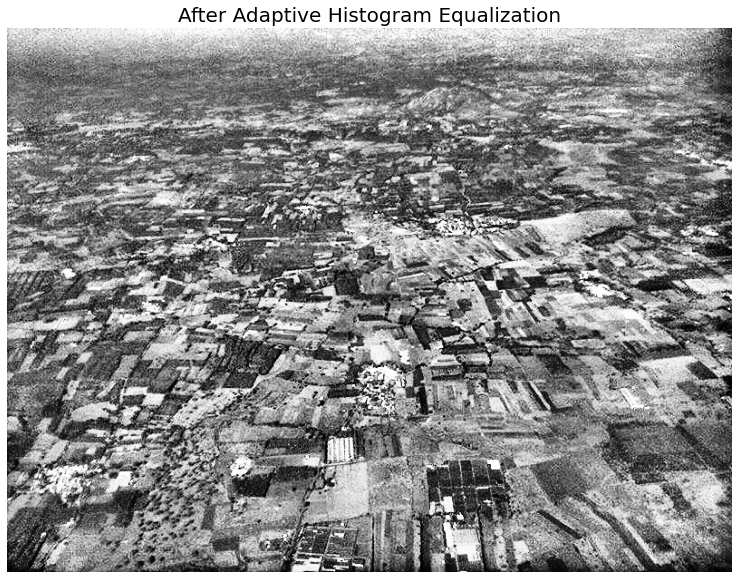

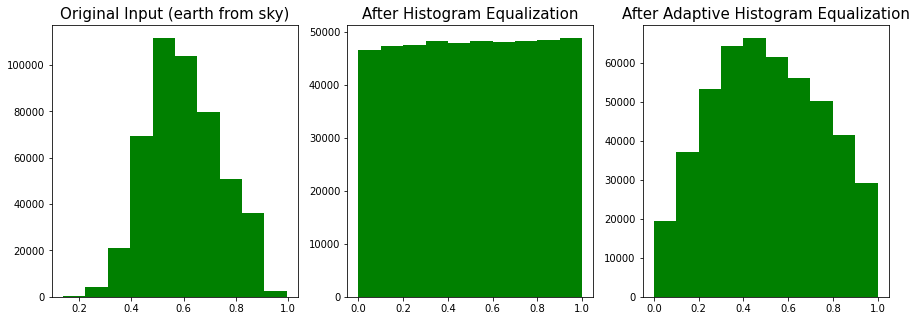

In [8]:
img = rgb2gray(imread('earthfromsky.jpg'))
# histogram equalization
img_eq = exposure.equalize_hist(img)
# adaptive histogram equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
pylab.gray()
images = [img, img_eq, img_adapteq]
titles = ['Original Input (earth from sky)', 'After Histogram Equalization', 'After Adaptive Histogram Equalization']
for i in range(3):
    pylab.figure(figsize=(20,10)), plot_image(images[i], titles[i])
pylab.figure(figsize=(15,5))
for i in range(3):
    pylab.subplot(1,3,i+1), pylab.hist(images[i].ravel(), color='g'), pylab.title(titles[i], size=15)
pylab.show()

<ipython-input-9-cc6dc3ee7b80>:17: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  im = (rgb2gray(imread('beans_g.png'))*255).astype(np.uint8)


<Figure size 432x288 with 0 Axes>

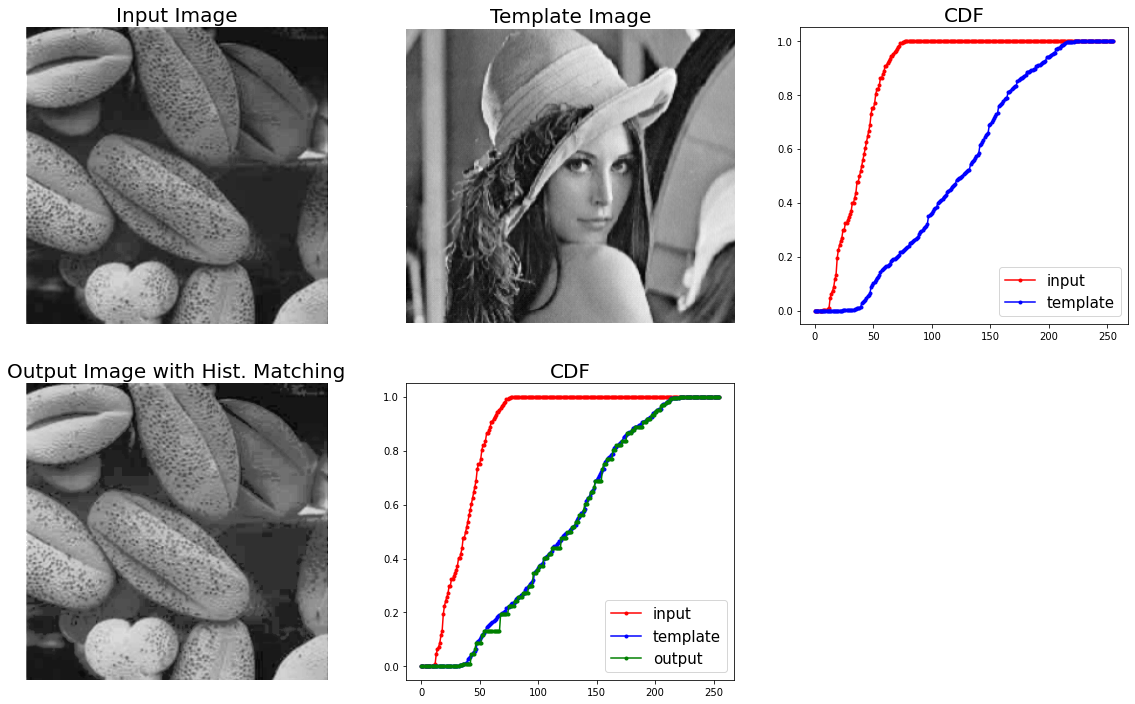

In [9]:
def cdf(im):
    c, b = cumulative_distribution(im)
    # pad the beginning and ending pixels and their CDF values
    c = np.insert(c, 0, [0]*b[0])
    c = np.append(c, [1]*(255-b[-1]))
    return c

def hist_matching(c, c_t, im):
    pixels = np.arange(256)
    new_pixels = np.interp(c, c_t, pixels)
    im = (np.reshape(new_pixels[im.ravel()], im.shape)).astype(np.uint8)
    return im

ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/beans_g.png','beans_g.png')
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/lena_g.png','lena_g.png')
pylab.gray()
im = (rgb2gray(imread('beans_g.png'))*255).astype(np.uint8)
im_t = (rgb2gray(imread('lena_g.png'))*255).astype(np.uint8)
pylab.figure(figsize=(20,12))
pylab.subplot(2,3,1), plot_image(im, 'Input Image')
pylab.subplot(2,3,2), plot_image(im_t, 'Template Image')
c = cdf(im)
c_t = cdf(im_t)
pylab.subplot(2,3,3)
p = np.arange(256)
pylab.plot(p, c, 'r.-', label='input')
pylab.plot(p, c_t, 'b.-', label='template')
pylab.legend(prop={'size': 15})
pylab.title('CDF', size=20)
im = hist_matching(c, c_t, im)
pylab.subplot(2,3,4), plot_image(im, 'Output Image with Hist. Matching')
c1 = cdf(im)
pylab.subplot(2,3,5)
pylab.plot(np.arange(256), c, 'r.-', label='input')
pylab.plot(np.arange(256), c_t, 'b.-', label='template')
pylab.plot(np.arange(256), c1, 'g.-', label='output')
pylab.legend(prop={'size': 15})
pylab.title('CDF', size=20)
pylab.show()

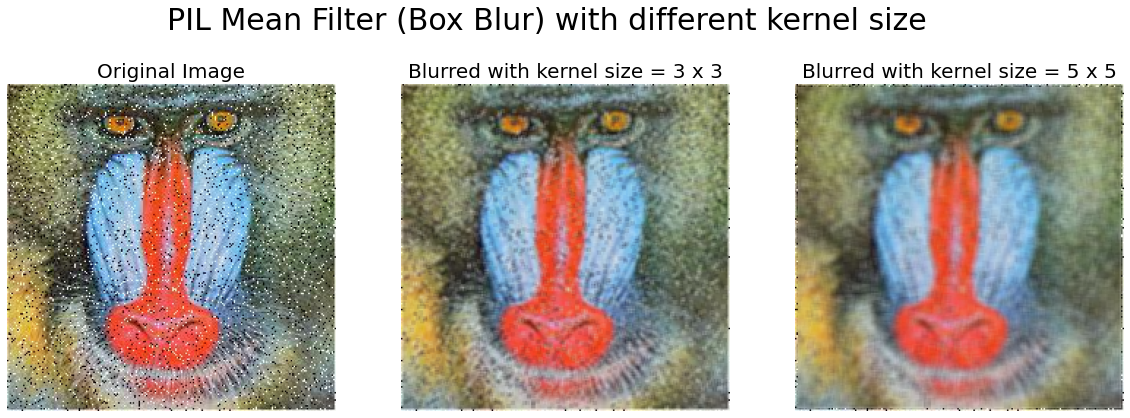

In [10]:
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/mandrill_spnoise_0.1.jpg','mandrill_spnoise_0.1.jpg')
im = Image.open('mandrill_spnoise_0.1.jpg')
pylab.figure(figsize=(20,7))
pylab.subplot(1,3,1), pylab.imshow(im), plot_image(im, 'Original Image'), pylab.axis('off')
for n in [3,5]:
    box_blur_kernel = np.reshape(np.ones(n*n),(n,n)) / (n*n)
    im1 = im.filter(ImageFilter.Kernel((n,n), box_blur_kernel.flatten()))
    pylab.subplot(1,3,(2 if n==3 else 3))
    plot_image(im1, 'Blurred with kernel size = ' + str(n) + ' x ' + str(n))
pylab.suptitle('PIL Mean Filter (Box Blur) with different kernel size', size=30)
pylab.show()

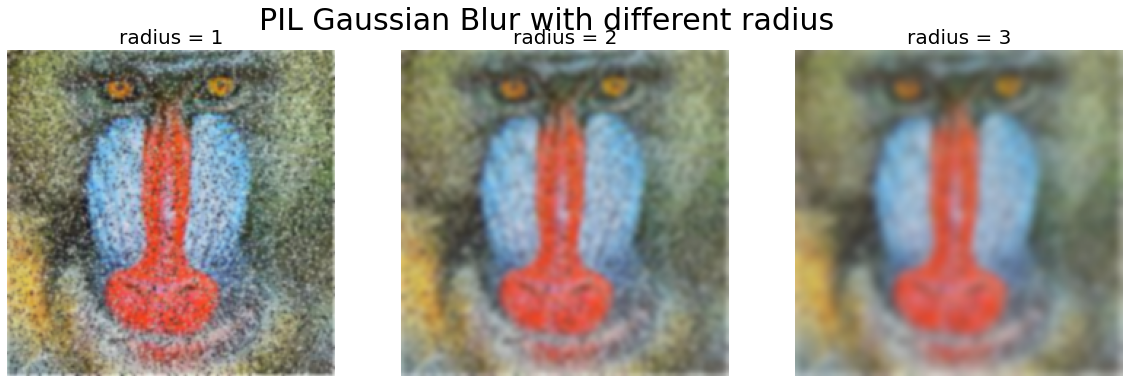

In [11]:
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/mandrill_spnoise_0.2.jpg','mandrill_spnoise_0.2.jpg')
im = Image.open('mandrill_spnoise_0.2.jpg')
pylab.figure(figsize=(20,6))
i = 1
for radius in range(1, 4):
    im1 = im.filter(ImageFilter.GaussianBlur(radius))
    pylab.subplot(1,3,i), plot_image(im1, 'radius = ' + str(round(radius,2)))
    i += 1
pylab.suptitle('PIL Gaussian Blur with different radius', size = 30)
pylab.show()

In [12]:
#denoise_bilateral(im2,sigma_spatial=5,sigma_color=0.1)
#denoise_nl_means(im2,h=0.8*sigma_est,fast_mode=False,**patch_kw)

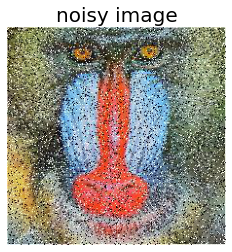

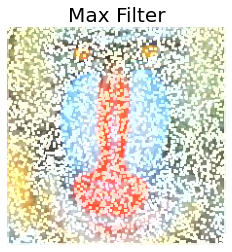

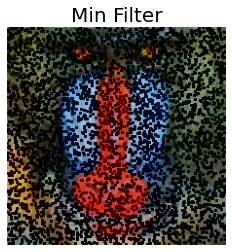

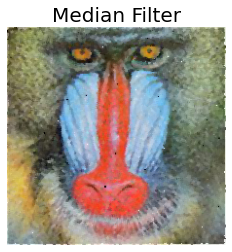



Bilateral Filter




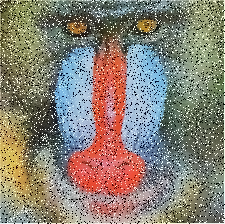



Non local means




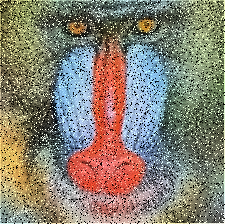

In [13]:
from google.colab.patches import cv2_imshow
im = Image.open('mandrill_spnoise_0.2.jpg')
l=[ImageFilter.MaxFilter(size=3),ImageFilter.MinFilter(size=3),ImageFilter.MedianFilter(size=3)]
l1=["Max Filter","Min Filter","Median Filter"]
plot_image(im,"noisy image")
pylab.show()
for i in range(2,5):
  im1=im.filter(filter=l[i-2])
  plot_image(im1,l1[i-2])
  pylab.show()
im2=cv2.imread('mandrill_spnoise_0.2.jpg')
print("\n\nBilateral Filter\n\n")
cv2_imshow(cv2.bilateralFilter(im2,15, 75, 75))
print("\n\nNon local means\n\n")
cv2_imshow(cv2.fastNlMeansDenoisingColored(im2,None,10,10,7,21))

<ipython-input-14-9410082036e2>:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  im = rgb2gray(imread('chess.png'))
<ipython-input-14-9410082036e2>:8: RuntimeWarning: divide by zero encountered in true_divide
  im_dir = np.arctan(im_y/im_x)
<ipython-input-14-9410082036e2>:8: RuntimeWarning: invalid value encountered in true_divide
  im_dir = np.arctan(im_y/im_x)


<Figure size 432x288 with 0 Axes>

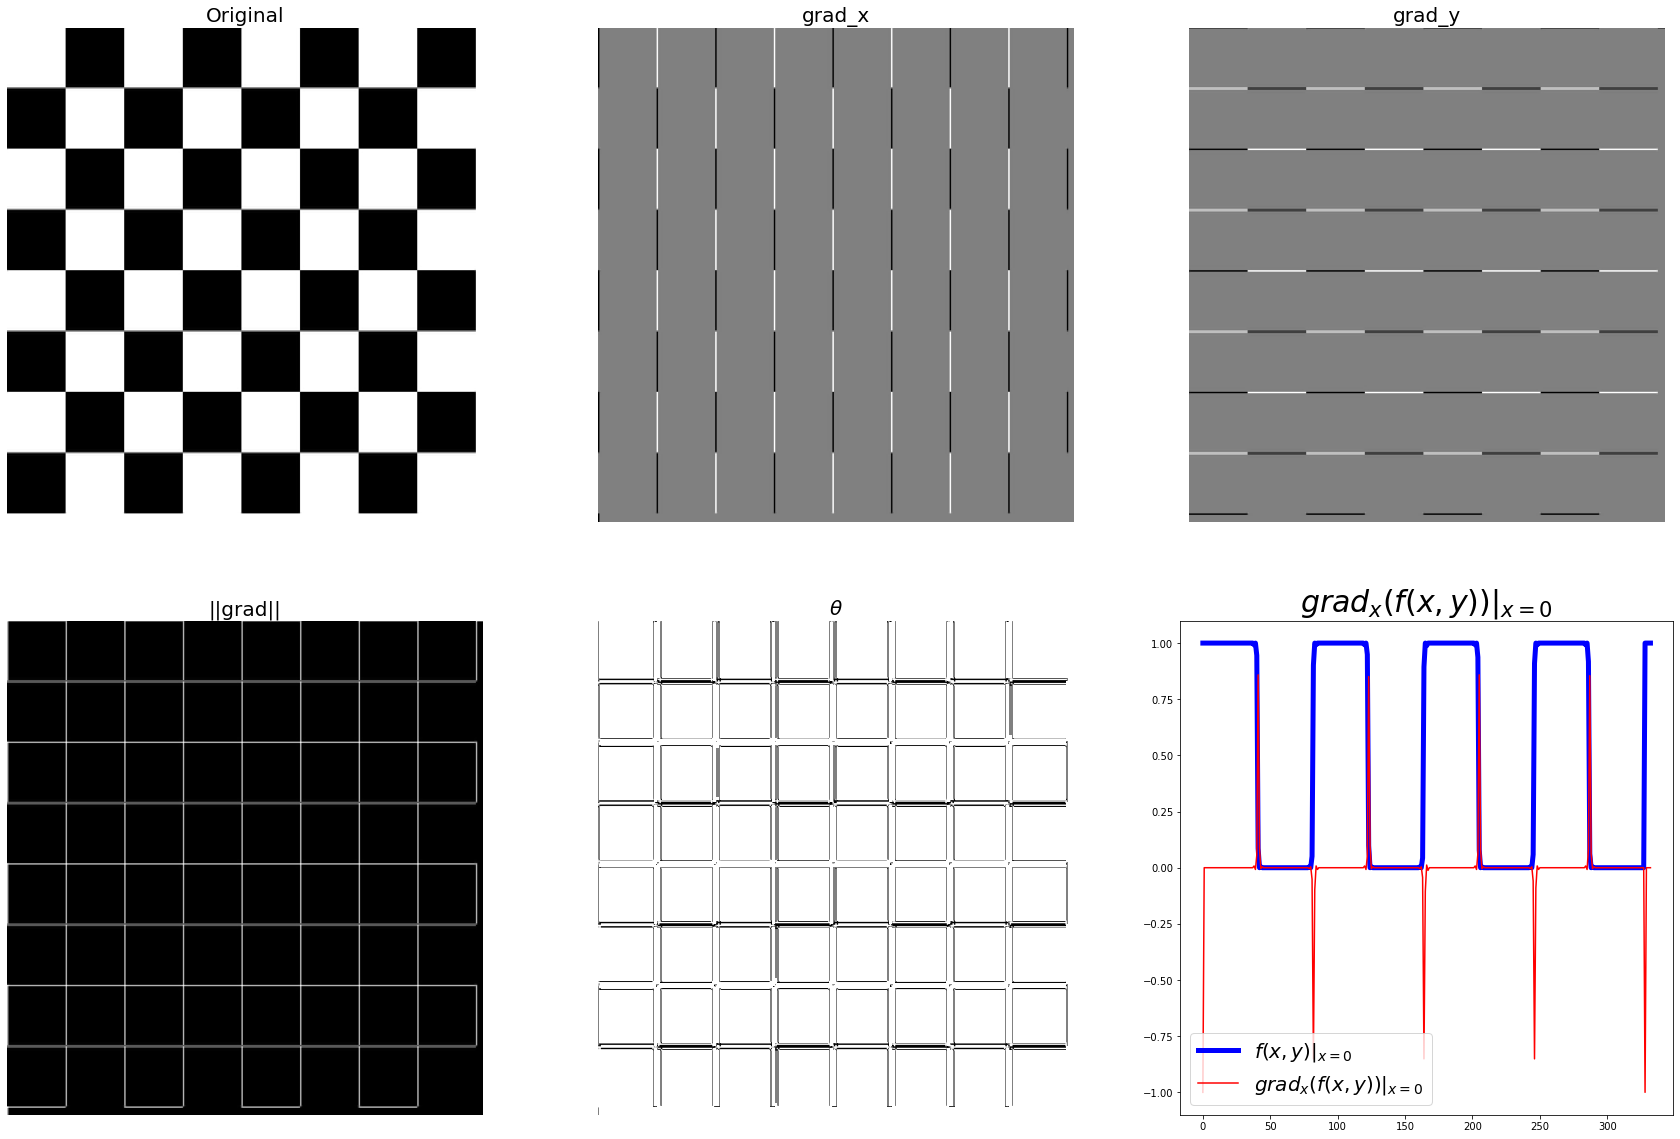

In [14]:
ureq.urlretrieve('https://raw.githubusercontent.com/PacktPublishing/Hands-On-Image-Processing-with-Python/master/images/chess.png','chess.png')
ker_x = [[-1, 1]]
ker_y = [[-1], [1]]
im = rgb2gray(imread('chess.png'))
im_x = signal.convolve2d(im, ker_x, mode='same')
im_y = signal.convolve2d(im, ker_y, mode='same')
im_mag = np.sqrt(im_x**2 + im_y**2)
im_dir = np.arctan(im_y/im_x)
pylab.gray()
pylab.figure(figsize=(30,20))
pylab.subplot(231), plot_image(im, 'Original'), pylab.subplot(232),
plot_image(im_x, 'grad_x')
pylab.subplot(233), plot_image(im_y, 'grad_y'), pylab.subplot(234),
plot_image(im_mag, '||grad||')
pylab.subplot(235), plot_image(im_dir, r'$\theta$'), pylab.subplot(236)
pylab.plot(range(im.shape[1]), im[0,:], 'b-', label=r'$f(x,y)|_{x=0}$', linewidth=5)
pylab.plot(range(im.shape[1]), im_x[0,:], 'r-', label=r'$grad_x (f(x,y))|_{x=0}$')
pylab.title(r'$grad_x (f(x,y))|_{x=0}$', size=30)
pylab.legend(prop={'size': 20})
pylab.show()

<ipython-input-15-23301edcac7f>:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  im = rgb2gray(imread('chess.png'))


<Figure size 432x288 with 0 Axes>

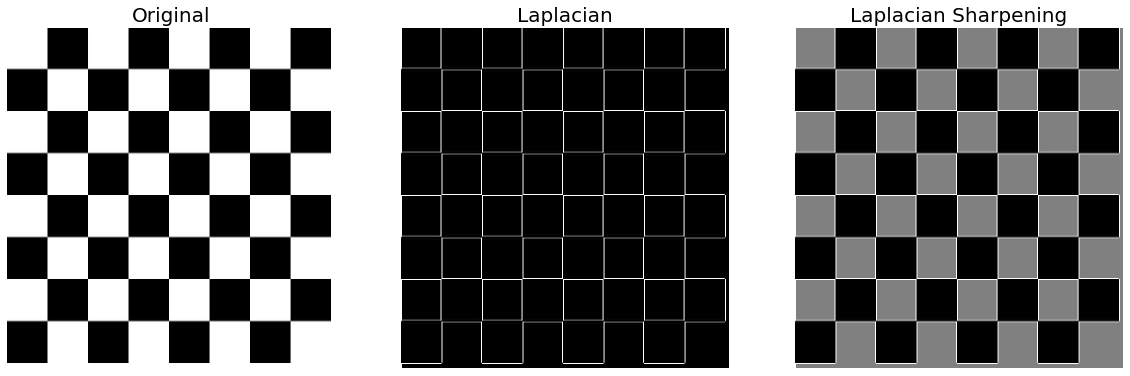

In [15]:
ker_laplacian = [[0,-1,0],[-1, 4, -1],[0,-1,0]]
im = rgb2gray(imread('chess.png'))
im1 = np.clip(signal.convolve2d(im, ker_laplacian, mode='same'),0,1)
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(131), plot_image(im, 'Original')
pylab.subplot(132), plot_image(im1, 'Laplacian')
pylab.subplot(133),plot_image(im+im1,"Laplacian Sharpening")
pylab.show()